# Regressão logística

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs # Generate isotropic Gaussian blobs for clustering.

A função de custo na regressão logística é dada por:
\begin{equation}
E_{in}= \frac{1}{N} \sum_{n=1}^{N} ln \left( 1 + e^{-y^{(n)}w^T x^{(n)}} \right)
\end{equation}

In [2]:
def logistic(x):
    return 1 / (1+np.exp(-x))

In [3]:
#TODO: implementar
def compute_cost(X, y, w, m, eps=1e-5):
    #TODO
    N = X.shape[0]
    y_hat = np.dot(X, w)
    ln = np.log( 1 + np.exp(-y*y_hat) )
    J = 1 / N  * np.sum( ln )
    return J

In [4]:
def compute_grad(X, y, w, m):
    y_hat = logistic(np.dot(X, w))
    grad = 1/m*(np.dot(X.T, y_hat - y))
    return grad

def gradient_descent(X, y, w_init, learning_rate, n_iter):
    cost_history = np.zeros((n_iter, 1))

    m = y.shape[0]
    w = np.copy(w_init)
    for i in range(n_iter):
        grad = compute_grad(X, y, w, m)
        w = w - learning_rate * grad
        cost_history[i] = compute_cost(X, y, w, m)

    return w, cost_history 

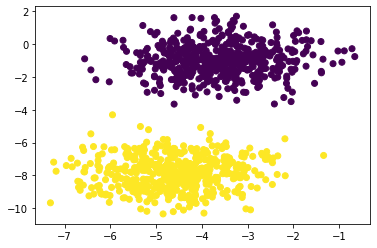

In [5]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=420)

m = len(y)
X = np.hstack((np.ones((m,1)),X)) # adiciona dimensão extra (bias)
y = y.reshape(-1,1)

plt.scatter(X[:,1], X[:,2], c=y[:,0])

In [22]:
learning_rate = 0.002
w_init = np.zeros((X.shape[1],1))
iterations = 10000

compute_cost(X, y, w_init, len(y))

0.6931471805599454

In [23]:
compute_grad(X, y, w_init, len(y))

array([[0.        ],
       [0.24530505],
       [1.72110489]])

Text(0, 0.5, 'cost')

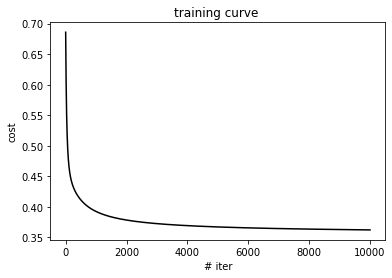

In [24]:
w, cost_history = gradient_descent(X, y, w_init, learning_rate, iterations)

plt.plot(range(len(cost_history)), cost_history, 'k')
plt.title("training curve ")
plt.xlabel("# iter")
plt.ylabel("cost")

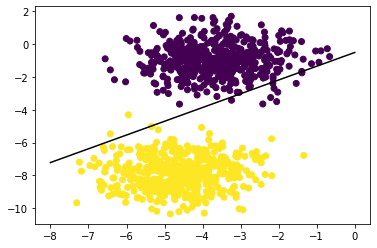

In [25]:
a = -w[1] / w[2] # slope
b = -w[0] / w[2] # intercept

plt.scatter(X[:,1],X[:,2], c=y.reshape(-1));

x_l = np.linspace(-8, 0, 50)
y_l = a*x_l + b
plt.plot(x_l, y_l, c='k');